In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib
%matplotlib inline 

## Whale portfolio data sort and Clean ##

In [2]:
# Use the Pathlib libary to set the path to the CSV
whale_returns = Path("Resources/whale_returns.csv")

# Use the file path to read the CSV into a DataFrame
whale_returns_df = pd.read_csv(whale_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)

#Sort in ascending order
whale_returns_df.sort_index(ascending = True, inplace = True)

#check df has worked
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns_df.isnull().sum()
whale_returns_df[whale_returns_df.isnull().any(axis = 1)]

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN


In [4]:
# Drop nulls
whale_returns_df.dropna(inplace=True)
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Harolds data sort and clean ##

In [5]:
# Use the Pathlib libary to set the path to the CSV
algo_returns = Path("Resources/algo_returns.csv")

# Use the file path to read the CSV into a DataFrame
algo_returns_df = pd.read_csv(algo_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)

#Sort in ascending order
algo_returns_df.sort_index(ascending = True, inplace = True)

#check df has worked
algo_returns_df.tail()

,Algo 1,Algo 2
Date,,
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829
2019-04-30,-0.002944,-0.001570
2019-05-01,0.000094,-0.007358


In [6]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns_df.dropna(inplace=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX data sort and clean ##

In [8]:
# Use the Pathlib libary to set the path to the CSV
sp_tsx = Path("Resources/sp_tsx_history.csv")

# Use the file path to read the CSV into a DataFrame
sp_tsx_history_df = pd.read_csv(sp_tsx, index_col="Date", infer_datetime_format=True, parse_dates=True)

#Sort in ascending order
sp_tsx_history_df.sort_index(ascending = True, inplace = True)

#check df has worked
sp_tsx_history_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [9]:
#findout data types.
sp_tsx_history_df.dtypes

Close    object
dtype: object

In [10]:
# remove $ sign:
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].str.replace("$","",regex=False)
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].str.replace(",","",regex=False)

# change to decimal:
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].astype(float)

In [11]:
sp_tsx_history_df.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [12]:
# Calculate Daily Returns
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].pct_change()  
sp_tsx_history_df["Close"].head()

Date
2012-10-01         NaN
2012-10-02    0.001701
2012-10-03   -0.002563
2012-10-04    0.007137
2012-10-05   -0.002305
Name: Close, dtype: float64

In [13]:
# Drop nulls
sp_tsx_history_df.dropna(inplace=True)

# Rename `Close` Column to be specific to this portfolio.
sp_tsx_history_df.columns = ["sp_tsx_60"]
sp_tsx_history_df.head()

,sp_tsx_60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX Returns ##

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX Returns into a single DataFrame with columns for each portfolio's returns.
portfolios_df = pd.concat([whale_returns_df,algo_returns_df,sp_tsx_history_df],axis = 1, join = "inner")
portfolios_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_tsx_60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


## Conduct Quantitative Analysis ## 

### Calculate and Plot the daily returns ###

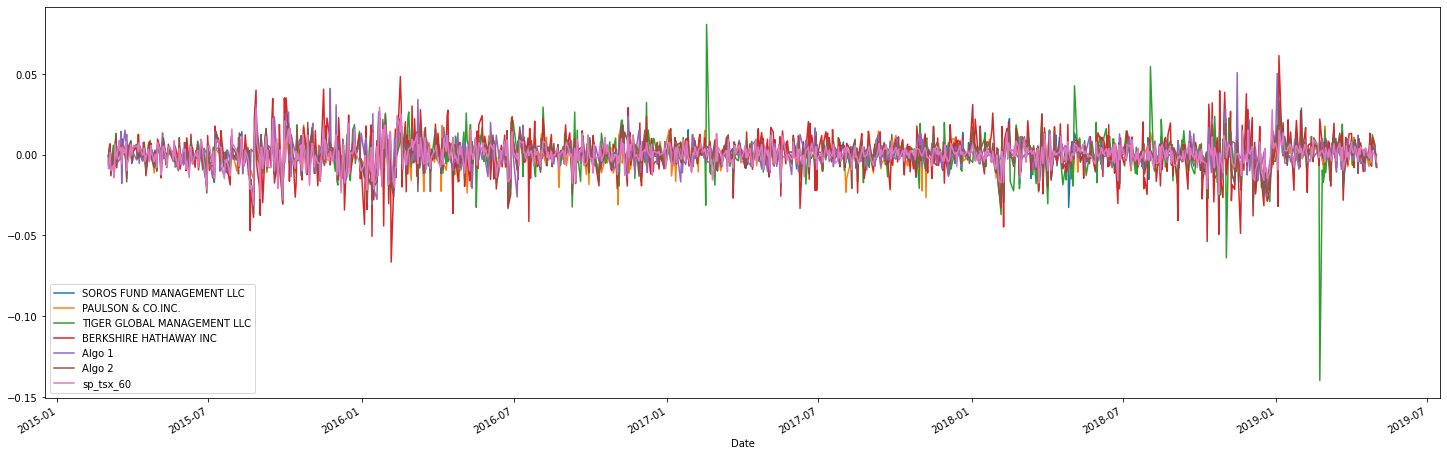

In [16]:
# Plot daily returns of all portfolios
portfolios_df.plot(figsize = (25, 8));


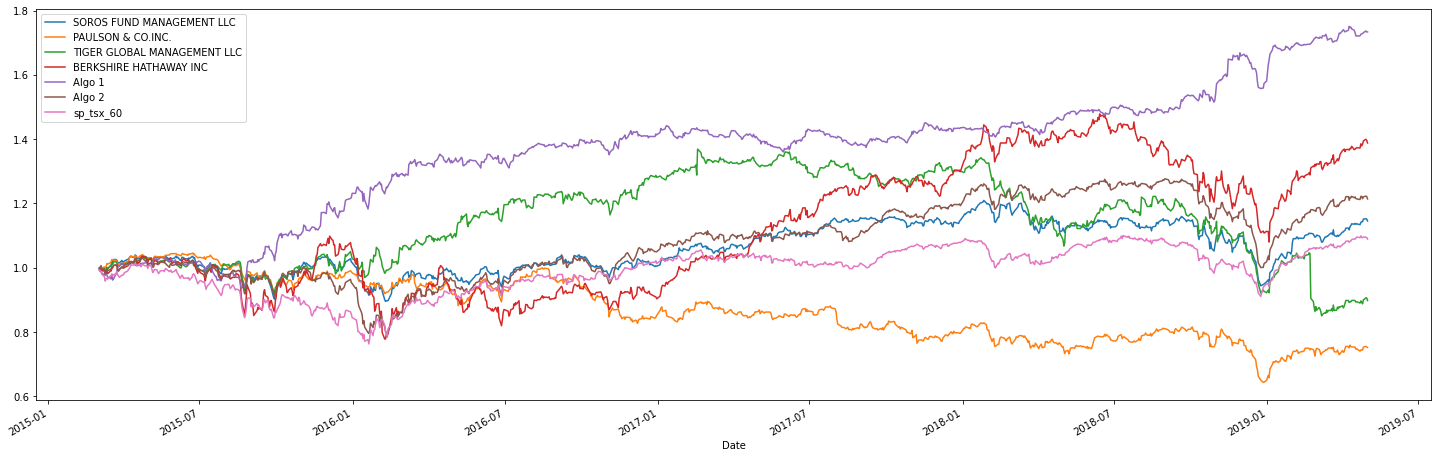

In [17]:
# Calculate cumulative returns of all portfolios
cum_df = 1 + (portfolios_df).cumsum()
# Plot cumulative returns
cum_df.plot(figsize= (25,8));

## Risk Analysis ##

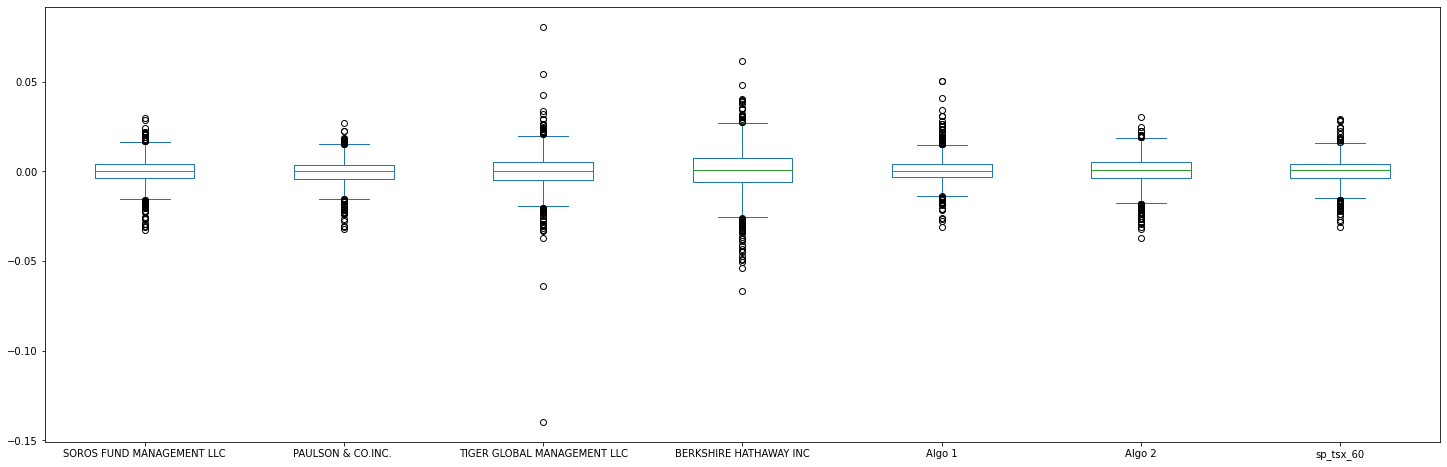

In [18]:
# Box plot to visually show risk
portfolios_df.plot(kind = "box", figsize = (25,8));

### Calculate Standard Deviations ###

In [19]:
# Calculate the daily standard deviations of all portfolios
std_daily = portfolios_df.std()
std_daily

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
sp_tsx_60                      0.007034
dtype: float64

## Determine which portfolios are riskier than the S&P TSX ##

In [20]:
# Calculate  the daily standard deviation of S&P TSX
sp_tsx_std = std_daily["sp_tsx_60"]
# Determine which portfolios are riskier than the S&P TSX
std_daily > sp_tsx_std

SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                          True
Algo 2                          True
sp_tsx_60                      False
dtype: bool

## Calculate the Annualized Standard Deviation ##

In [21]:
# Calculate the annualized standard deviation (252 trading days)
np.sqrt(portfolios_df.var() *252)

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
sp_tsx_60                      0.111664
dtype: float64

## Rolling Statistics ##

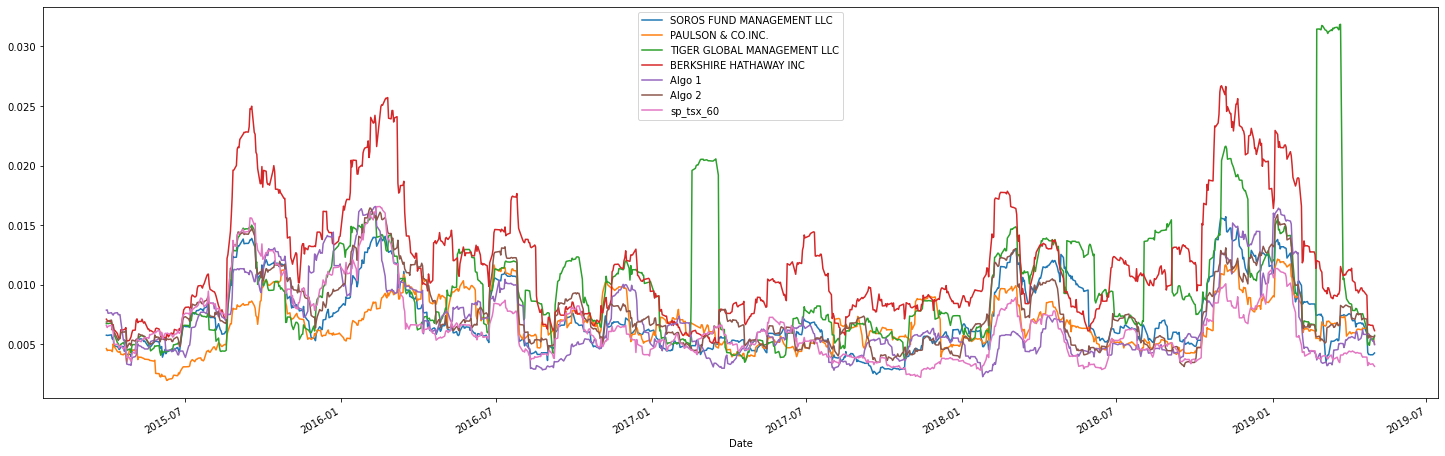

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
std_rolling_21 = portfolios_df.rolling(window=21).std()
# Plot the rolling standard deviation
std_rolling_21.plot(figsize =(25, 8));

## Calculate and plot the correlation ##

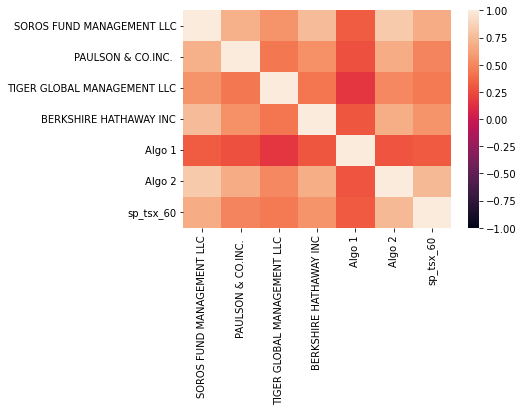

In [23]:
import seaborn as sns
%matplotlib inline

# Display de correlation matrix
portfolios_correlation = portfolios_df.corr()
sns.heatmap(portfolios_correlation, vmin=-1, vmax=1);

## Calculate and Plot Beta for Harold's portfolio and the S&P TSX ##

In [24]:
# concat whale and S&P TSX dataframes
H_and_sp_df = pd.concat([algo_returns_df,sp_tsx_history_df],axis = 1, join = "inner")
H_and_sp_df.head()

,Algo 1,Algo 2,sp_tsx_60
Date,,,
2014-06-05,0.004062,0.013285,0.000229
2014-06-06,0.001857,0.008284,0.002616
2014-06-09,-0.005012,0.005668,0.002177
2014-06-10,0.004406,-0.000735,0.002230
2014-06-11,0.004760,-0.003761,-0.000822


In [25]:
# Calculate covariance of all daily returns of Harolds vs. S&P TSX 60
covariance_HA1 = H_and_sp_df['Algo 1'].cov(H_and_sp_df['sp_tsx_60'])

# Calculate variance of the S&P TSX
variance_HA1 = H_and_sp_df['sp_tsx_60'].var()

# Calculate beta of all daily returns of MSFT
Harold_beta_HA1 = covariance_HA1 / variance_HA1

covariance_HA2 = H_and_sp_df['Algo 2'].cov(H_and_sp_df['sp_tsx_60'])

# Calculate variance of the S&P TSX
variance_HA2 = H_and_sp_df['sp_tsx_60'].var()

# Calculate beta of all daily returns of MSFT
Harold_beta_HA2 = covariance_HA2 / variance_HA2


In [26]:
# Calculate 30-day rolling covariance of social media stocks vs. S&P 500 and plot the data
rolling_covariance_HA1 = H_and_sp_df["Algo 1"].rolling(window=60).cov(H_and_sp_df["sp_tsx_60"])
rolling_covariance_HA2 = H_and_sp_df["Algo 2"].rolling(window=60).cov(H_and_sp_df["sp_tsx_60"])

# Calculate 30-day rolling variance of S&P 500
rolling_variance_sp_tsx_60 = H_and_sp_df["sp_tsx_60"].rolling(window=60).var()

# Calculate 30-day rolling beta of social media stocks and plot the data
rolling_HA1_beta = rolling_covariance_HA1 / rolling_variance_sp_tsx_60
rolling_HA2_beta = rolling_covariance_HA2 / rolling_variance_sp_tsx_60


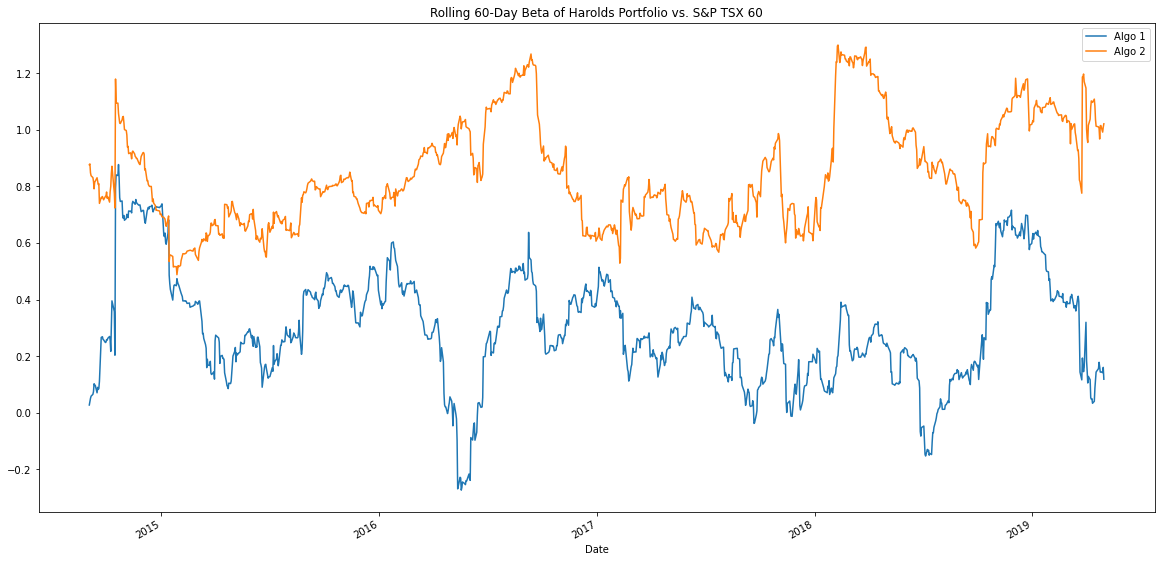

In [27]:
ax = rolling_HA1_beta.plot(figsize=(20, 10), title="Rolling 60-Day Beta of Harolds Portfolio vs. S&P TSX 60")
rolling_HA2_beta.plot(ax=ax)

# Set the legend of the figure
ax.legend(["Algo 1", "Algo 2"]);

## Rolling Statistics Challenge: Exponentially Weighted Average ##

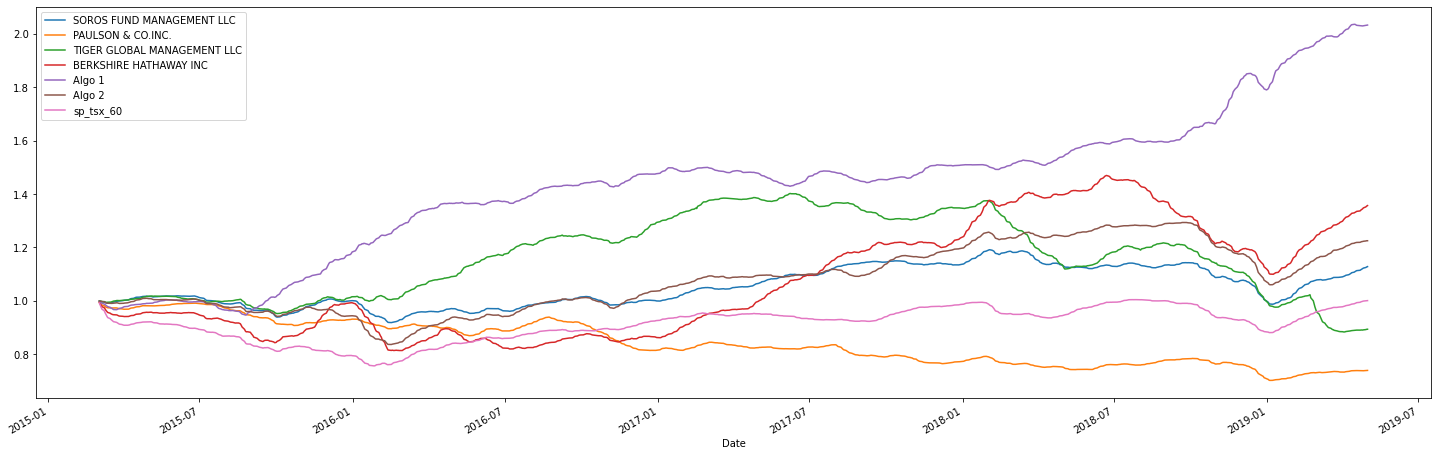

In [28]:
# Use `ewm` to calculate the rolling window
portfolios_df_ewm = portfolios_df.ewm(span = 21,adjust = False).mean()
(1+portfolios_df_ewm).cumprod().plot(figsize = (25,8));

## Sharpe Ratios ##

In [29]:
# Annualzied Sharpe Ratios
sharpe_ratios = portfolios_df.mean()*252/(portfolios_df.std()*np.sqrt(252))
sharpe_ratios


SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
sp_tsx_60                      0.195550
dtype: float64

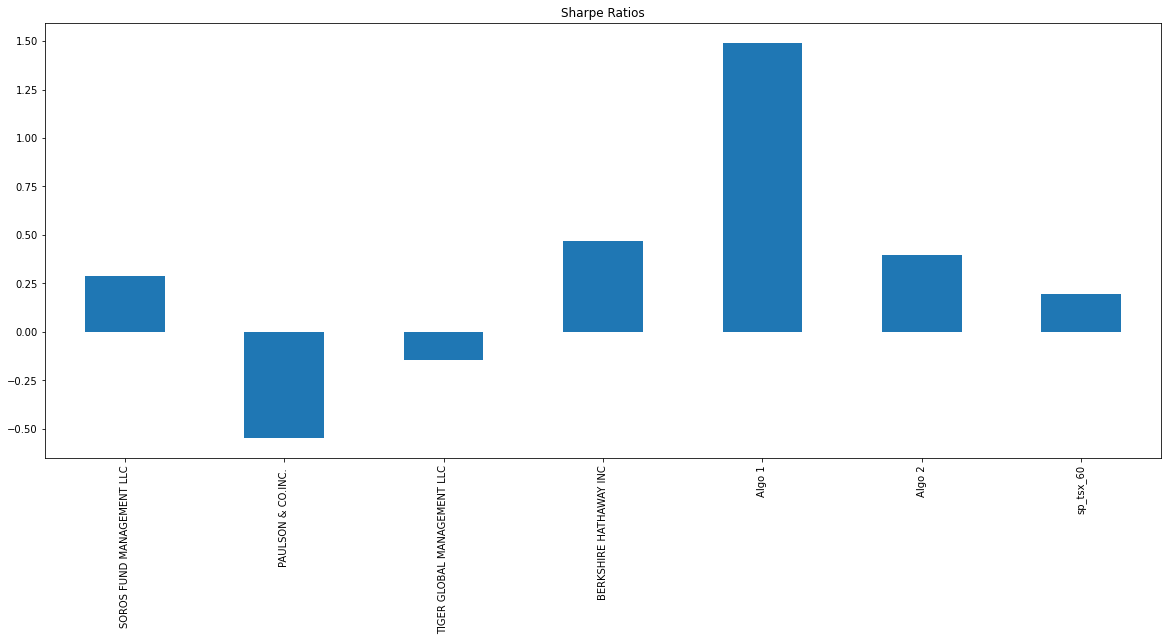

In [30]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios", figsize = (20,8));

### Algo 1 outperformed S&P TSX 60 and whales returns to risk. ###
### While algo 2 fell below S&P TSX 60 and BERKSHIRE HATHAWAY INC returns to risk but outperformed SOROS FUND MANAGEMENT LLC, PAULSON & CO.INC., TIGER GLOBAL MANAGEMENT LLC  ###

## Create Custom Portfolio ##

In [40]:
# Use the Pathlib libary to set the path to the CSV
Spotify_history = Path("Resources/Spotify_history.csv.csv")

# Use the file path to read the CSV into a DataFrame
Spotify_history_df = pd.read_csv(Path("Resources/Spotify_history.csv.csv"), index_col="Date", parse_dates = True, infer_datetime_format= True)

#Sort in ascending order
Spotify_history_df.sort_index(ascending = True, inplace = True)

#rename column
Spotify_history_df.rename(columns = {"Close":"Spotify_history"}, inplace = True)

#check df has worked
Spotify_history_df.head()

,Spotify_history
Date,
2018-04-02 16:00:00,132.00
2018-04-03 16:00:00,149.01
2018-04-04 16:00:00,144.22
2018-04-05 16:00:00,143.99
2018-04-06 16:00:00,147.92


In [41]:
daily_returns_Spotify = Spotify_history_df.pct_change()
daily_returns_Spotify.head()

,Spotify_history
Date,
2018-04-02 16:00:00,NaN
2018-04-03 16:00:00,0.128864
2018-04-04 16:00:00,-0.032145
2018-04-05 16:00:00,-0.001595
2018-04-06 16:00:00,0.027294


In [42]:
# Use the Pathlib libary to set the path to the CSV
Netflix_inc_history = Path("Resources/Netflix_history.csv.csv")

# Use the file path to read the CSV into a DataFrame
Netflix_inc_history_df = pd.read_csv(Path("Resources/Netflix_history.csv.csv"), index_col="Date", parse_dates = True, infer_datetime_format= True)

#Sort in ascending order
Netflix_inc_history_df.sort_index(ascending = True, inplace = True)

Netflix_inc_history_df.rename(columns = {"Close":"Netflix_inc_history"}, inplace = True)

#check df has worked
Netflix_inc_history_df.head()

,Netflix_inc_history
Date,
2014-05-28 16:00:00,57.32
2014-05-29 16:00:00,59.31
2014-05-30 16:00:00,59.69
2014-06-02 16:00:00,60.29
2014-06-03 16:00:00,59.65


In [43]:
# Calculate daily_returns
daily_returns_Netflix = Netflix_inc_history_df.pct_change()
daily_returns_Netflix.head()

,Netflix_inc_history
Date,
2014-05-28 16:00:00,NaN
2014-05-29 16:00:00,0.034717
2014-05-30 16:00:00,0.006407
2014-06-02 16:00:00,0.010052
2014-06-03 16:00:00,-0.010615


In [44]:
# Reading data from 3rd stock
# Use the Pathlib libary to set the path to the CSV
PayPal_Holdings_Inc_history = Path("Resources/paypal_history.csv.csv")

# Use the file path to read the CSV into a DataFrame
PayPal_Holdings_Inc_history_df = pd.read_csv(Path("Resources/paypal_history.csv.csv"), index_col="Date", parse_dates = True, infer_datetime_format= True)

#Sort in ascending order
PayPal_Holdings_Inc_history_df.sort_index(ascending = True, inplace = True)

PayPal_Holdings_Inc_history_df.rename(columns = {"Close":"PayPal_Holdings_Inc_history"}, inplace = True)

#check df has worked
PayPal_Holdings_Inc_history_df.head()

,PayPal_Holdings_Inc_history
Date,
2015-07-06 16:00:00,36.71
2015-07-07 16:00:00,36.62
2015-07-08 16:00:00,34.70
2015-07-09 16:00:00,34.50
2015-07-10 16:00:00,34.69


In [45]:
daily_returns_PayPal = PayPal_Holdings_Inc_history_df.pct_change()
daily_returns_PayPal.head()

,PayPal_Holdings_Inc_history
Date,
2015-07-06 16:00:00,NaN
2015-07-07 16:00:00,-0.002452
2015-07-08 16:00:00,-0.052430
2015-07-09 16:00:00,-0.005764
2015-07-10 16:00:00,0.005507


In [46]:
 # Combine all stocks in a single DataFrame
roys_portfolio_df = pd.concat((Netflix_inc_history_df, PayPal_Holdings_Inc_history_df, Spotify_history_df), axis = 1, join= "inner")

#Sort in ascending order
roys_portfolio_df.sort_index(ascending = True, inplace = True)
roys_portfolio_df.head()

,Netflix_inc_history,PayPal_Holdings_Inc_history,Spotify_history
Date,,,
2018-04-02 16:00:00,280.29,75.00,132.00
2018-04-03 16:00:00,283.67,74.56,149.01
2018-04-04 16:00:00,288.94,74.78,144.22
2018-04-05 16:00:00,293.97,76.95,143.99
2018-04-06 16:00:00,288.85,73.86,147.92


In [47]:
roys_portfolio_df.index = roys_portfolio_df.index.normalize()
roys_portfolio_df.head()

,Netflix_inc_history,PayPal_Holdings_Inc_history,Spotify_history
Date,,,
2018-04-02,280.29,75.00,132.00
2018-04-03,283.67,74.56,149.01
2018-04-04,288.94,74.78,144.22
2018-04-05,293.97,76.95,143.99
2018-04-06,288.85,73.86,147.92


In [48]:
# Calculate Daily Returns
daily_returns = roys_portfolio_df.pct_change()
daily_returns.head()

,Netflix_inc_history,PayPal_Holdings_Inc_history,Spotify_history
Date,,,
2018-04-02,NaN,NaN,NaN
2018-04-03,0.012059,-0.005867,0.128864
2018-04-04,0.018578,0.002951,-0.032145
2018-04-05,0.017408,0.029018,-0.001595
2018-04-06,-0.017417,-0.040156,0.027294


In [49]:
#Use the `dot` function to multiply the weights by each stock's daily return to get the portfolio daily return
weights = [1/3, 1/3, 1/3]

portfolio_returns = daily_returns.dot(weights)
portfolio_returns.head()

Date
2018-04-02         NaN
2018-04-03    0.045019
2018-04-04   -0.003539
2018-04-05    0.014944
2018-04-06   -0.010093
dtype: float64

In [51]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolios_df = pd.concat((daily_returns, portfolios_df), axis = 1, join= "inner")
all_portfolios_df.head()

,Netflix_inc_history,PayPal_Holdings_Inc_history,Spotify_history,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_tsx_60
Date,,,,,,,,,,
2018-04-02,NaN,NaN,NaN,-0.022198,-0.016517,-0.030521,-0.019699,-0.013233,-0.017412,-0.010011
2018-04-03,0.012059,-0.005867,0.128864,0.005025,0.006823,0.006223,0.008499,-0.005030,0.005674,-0.002149
2018-04-04,0.018578,0.002951,-0.032145,0.014781,0.003621,0.015294,0.006018,0.014715,0.009249,-0.001080
2018-04-05,0.017408,0.029018,-0.001595,0.011386,0.003220,0.001333,0.005187,0.000218,0.004818,0.012640
2018-04-06,-0.017417,-0.040156,0.027294,-0.015901,-0.011251,-0.014487,-0.014856,-0.009878,-0.011514,-0.009680


In [52]:
# Drop nulls
all_portfolios_df.dropna(inplace=True)
all_portfolios_df.head()

,Netflix_inc_history,PayPal_Holdings_Inc_history,Spotify_history,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_tsx_60
Date,,,,,,,,,,
2018-04-03,0.012059,-0.005867,0.128864,0.005025,0.006823,0.006223,0.008499,-0.005030,0.005674,-0.002149
2018-04-04,0.018578,0.002951,-0.032145,0.014781,0.003621,0.015294,0.006018,0.014715,0.009249,-0.001080
2018-04-05,0.017408,0.029018,-0.001595,0.011386,0.003220,0.001333,0.005187,0.000218,0.004818,0.012640
2018-04-06,-0.017417,-0.040156,0.027294,-0.015901,-0.011251,-0.014487,-0.014856,-0.009878,-0.011514,-0.009680
2018-04-09,0.003739,0.018007,0.014062,0.000776,0.002365,0.001869,0.000780,0.004021,-0.001483,0.001334


In [53]:
# Calculate the annualized standard deviation (252 trading days)
np.sqrt(all_portfolios_df.var() *252)

Netflix_inc_history            0.427152
PayPal_Holdings_Inc_history    0.307446
Spotify_history                0.422717
SOROS FUND MANAGEMENT LLC      0.142625
PAULSON & CO.INC.              0.112639
TIGER GLOBAL MANAGEMENT LLC    0.225640
BERKSHIRE HATHAWAY INC         0.229936
Algo 1                         0.127752
Algo 2                         0.131947
sp_tsx_60                      0.096659
dtype: float64

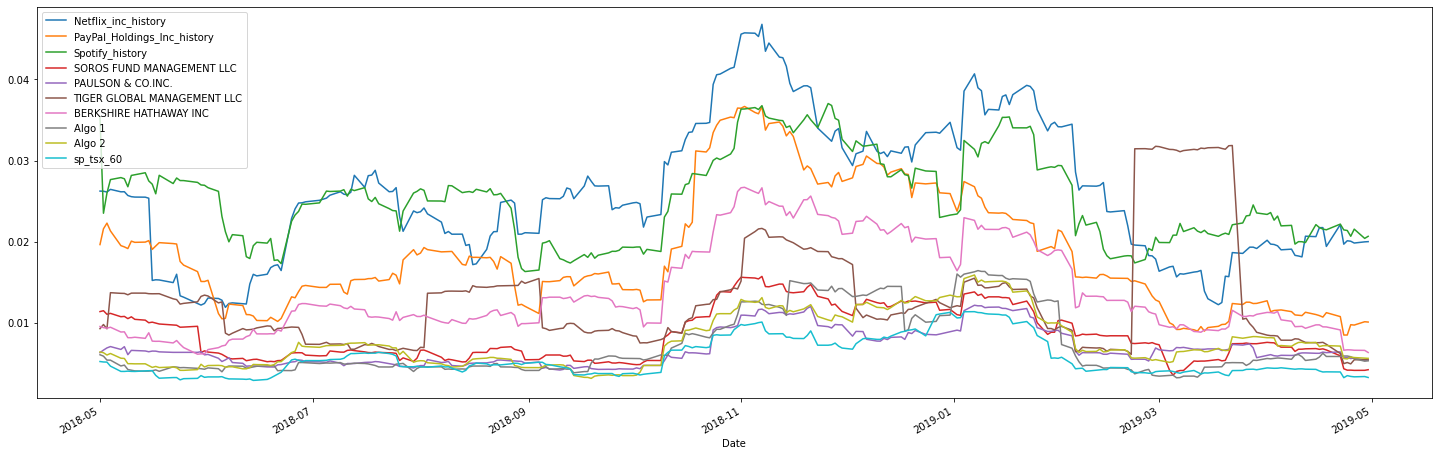

In [54]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
std_rolling_21 = all_portfolios_df.rolling(window=21).std()
# Plot the rolling standard deviation
std_rolling_21.plot(figsize =(25, 8));

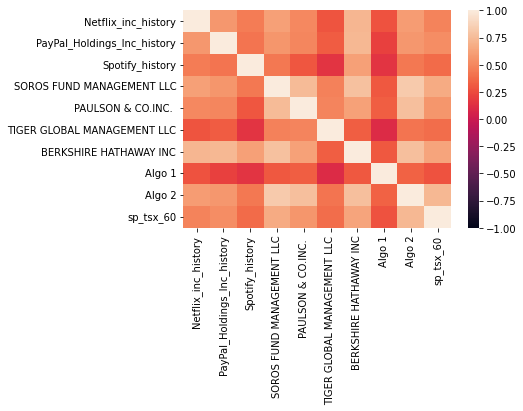

In [59]:
import seaborn as sns
%matplotlib inline

# Display de correlation matrix
portfolios_correlation = all_portfolios_df.corr()
sns.heatmap(portfolios_correlation, vmin=-1, vmax=1);

In [60]:
#Calculate and plot the 60-day rolling beta for your portfolio compared to the S&P 60 TSX.

# concat whale and S&P TSX dataframes
Roy_and_sp_df = pd.concat([daily_returns,sp_tsx_history_df],axis = 1, join = "inner")
Roy_and_sp_df.head()

,Netflix_inc_history,PayPal_Holdings_Inc_history,Spotify_history,sp_tsx_60
Date,,,,
2018-04-02,NaN,NaN,NaN,-0.010011
2018-04-03,0.012059,-0.005867,0.128864,-0.002149
2018-04-04,0.018578,0.002951,-0.032145,-0.001080
2018-04-05,0.017408,0.029018,-0.001595,0.012640
2018-04-06,-0.017417,-0.040156,0.027294,-0.009680


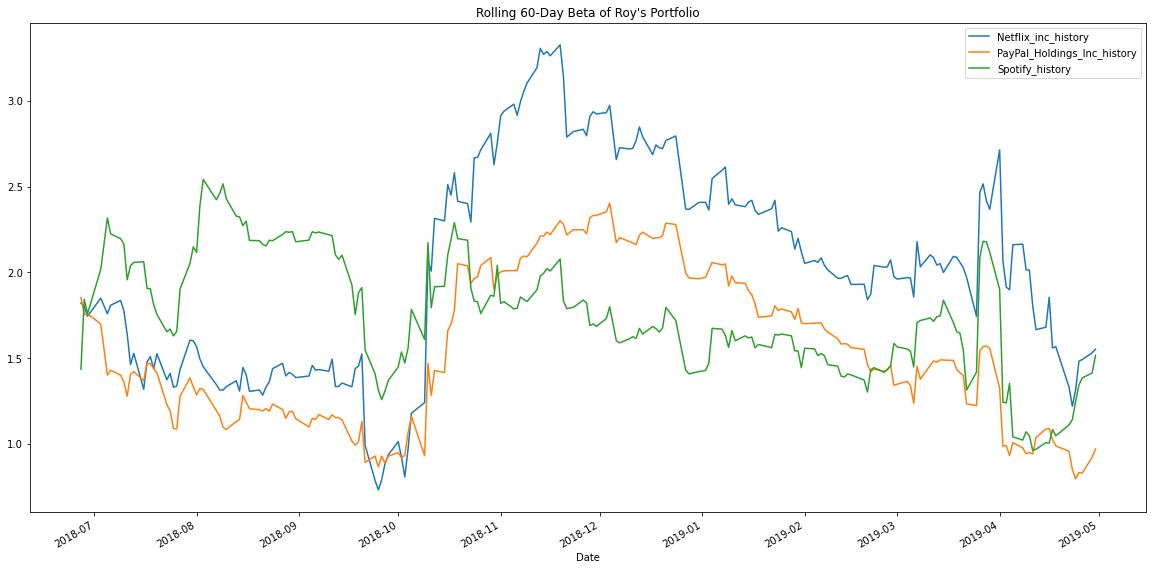

In [61]:
# Calculate covariance of all daily returns of Roys portfolio and sp_tsx_60 
covariance_Netflix_inc_history = Roy_and_sp_df['Netflix_inc_history'].cov(H_and_sp_df['sp_tsx_60'])
covariance_PayPal_Holdings_Inc_history = Roy_and_sp_df['PayPal_Holdings_Inc_history'].cov(H_and_sp_df['sp_tsx_60'])
covariance_Spotify_history = Roy_and_sp_df['Spotify_history'].cov(H_and_sp_df['sp_tsx_60'])


# Calculate variance of the S&P TSX 60
variance = Roy_and_sp_df["sp_tsx_60"].var()

# Calculate beta of all daily returns of Roys portfolio 
Netflix_inc_history_beta = covariance_Netflix_inc_history / variance
PayPal_Holdings_Inc_history_beta = covariance_PayPal_Holdings_Inc_history / variance
Spotify_history_beta = covariance_Spotify_history / variance

# Calculate 60-day rolling covariance of social media stocks vs. sp_tsx_60 and plot the data
rolling_covariance_Netflix_inc_history = Roy_and_sp_df["Netflix_inc_history"].rolling(window=60).cov(Roy_and_sp_df["sp_tsx_60"])
rolling_PayPal_Holdings_Inc_history = Roy_and_sp_df["PayPal_Holdings_Inc_history"].rolling(window=60).cov(Roy_and_sp_df["sp_tsx_60"])
rolling_Spotify_history = Roy_and_sp_df["Spotify_history"].rolling(window=60).cov(Roy_and_sp_df["sp_tsx_60"])

# Calculate 60-day rolling variance of sp_tsx_60
rolling_variance = Roy_and_sp_df["sp_tsx_60"].rolling(window=60).var()

# Calculate 60-day rolling beta of Roy's Portfolio and plot the data
rolling_covariance_Netflix_inc_history_beta = rolling_covariance_Netflix_inc_history / rolling_variance
rolling_PayPal_Holdings_Inc_history_beta = rolling_PayPal_Holdings_Inc_history / rolling_variance
rolling_Spotify_history_beta = rolling_Spotify_history / rolling_variance


ax = rolling_covariance_Netflix_inc_history_beta.plot(figsize=(20, 10), title="Rolling 60-Day Beta of Roy's Portfolio")
rolling_PayPal_Holdings_Inc_history_beta.plot(ax=ax)
rolling_Spotify_history_beta.plot(ax=ax)
# Set the legend of the figure
ax.legend(["Netflix_inc_history", "PayPal_Holdings_Inc_history", "Spotify_history"]);

In [62]:
#Calculate the Sharpe ratios and generate a bar plot.

# Annualzied Sharpe Ratios
sharpe_ratios = Roy_and_sp_df.mean()*252/(Roy_and_sp_df.std()*np.sqrt(252))
sharpe_ratios

Netflix_inc_history            0.526486
PayPal_Holdings_Inc_history    1.227090
Spotify_history                0.078426
sp_tsx_60                      0.692898
dtype: float64

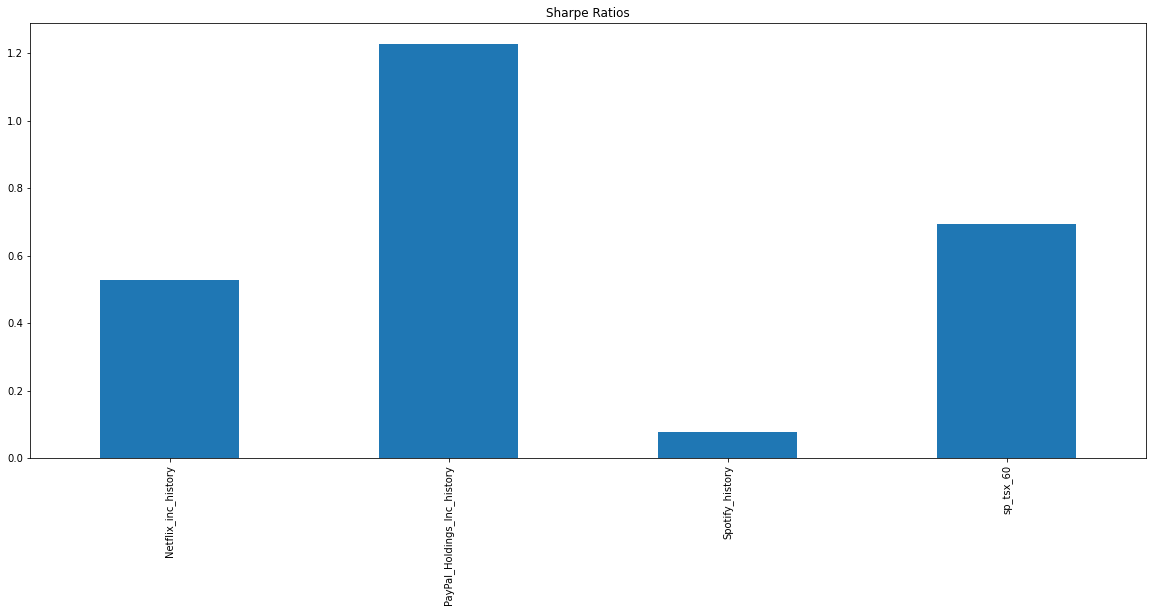

In [63]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios", figsize = (20,8));

### Roy's Portfolios holding of PayPal out performed S&P TSX 60 but Netflix and Spotify were out performed by S&P TSX 60 ###